In [163]:
!git clone http://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


Here test.p, train.p and valid.p are the pickel file. Pickel file is basicaaly when we have to save something on disk it can be pickled.That is it can be serialized.Before writing the file by serializing it it converts all the object to a character stream.Pickled files in Python essentially contain serialized data that can be unpick when desired.

In [164]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import random

In [0]:
np.random.seed(0)

Unpicling by deserializing using WITH Keyword. WITH Keyword is used whenever you wish to execute two operations as a pair and have a block of code in between and invoke a block of code in between.

In [167]:
with open("german-traffic-signs/train.p", "rb") as f:
  train_data = pickle.load(f)
with open("german-traffic-signs/test.p", "rb") as f:
  test_data = pickle.load(f)
with open("german-traffic-signs/valid.p", "rb") as f:
  val_data = pickle.load(f)
print(type(train_data))

<class 'dict'>


Now printing is the type of training data we can see that it's just a dictionary which contains key value pairs. Two of these values we're actually interested in one of them being the features and the other being the labels trended the labels the features and the labels the feature key which Feel free to print out.
You'll see that it corresponds to villanies of training images and pixel representation whereas the label as well intuitively its value corresponds to an array of labels which pretty much label each training image as belonging to some class.

In [0]:
X_train, y_train = train_data["features"], train_data["labels"]
X_test, y_test = test_data["features"], test_data["labels"]
X_val, y_val = val_data["features"], val_data["labels"]

Here we see we have 34799 image in training image set with dimension 32*32 along with depth of 3. As these traffic sign image is in RGB format unlike MNIST which has a depth of 1 i.e. Grayscale.

In [169]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


So once again we use accert. we must first assert that the number of images is equal to the number of labels. we started with the training data and clearly the number of images is denoted in index zero of its shape.

In [0]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of image is not equal to number of labels"
assert(X_test.shape[0]==y_test.shape[0]), "The number of image is not equal to number of labels"
assert(X_val.shape[0]==y_val.shape[0]), "The number of image is not equal to number of labels"

#Dimension Check

assert(X_train.shape[1:]== (32, 32, 3)), "The dimesion is not 32*32*3"
assert(X_test.shape[1:]== (32, 32, 3)), "The dimesion is not 32*32*3"
assert(X_val.shape[1:]== (32, 32, 3)), "The dimesion is not 32*32*3"


Let see What Kind of data that we are dealing with

In [171]:
import pandas as pd
data = pd.read_csv("german-traffic-signs/signnames.csv")
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


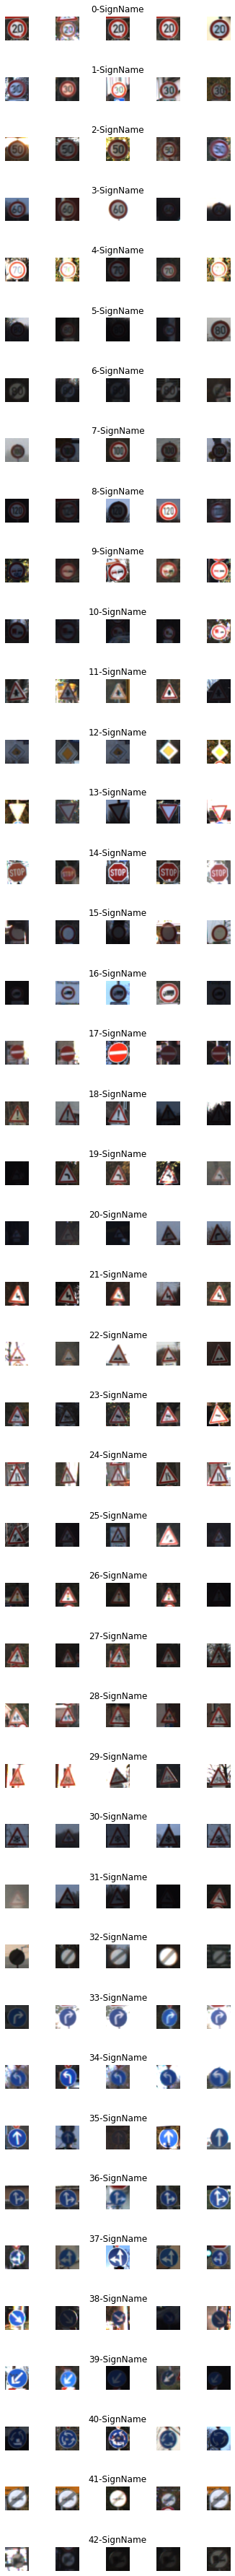

In [172]:
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows(): #itterating through (index,series)
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + "SignName")
            num_of_samples.append(len(x_selected))




[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

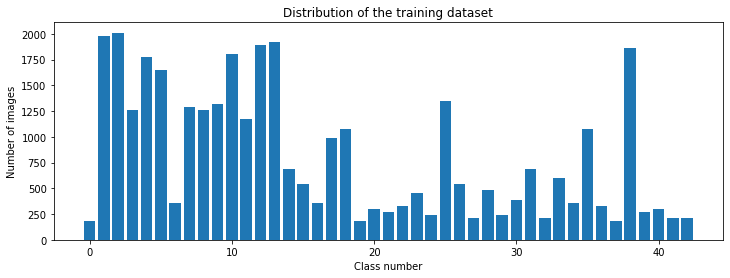

In [173]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

As we can see our traffic signed it is much less uniform than the endless data set that were used before. Some classes have a larger number of training images belonging to them. While some classes have very little training images this means that some classes will have less data to train with and might return less accurate results. While this is unfortunate it is a more realistic situation than our data sets. Oftentimes in practical application you will be faced with incomplete datasets or smaller data sets and will have to work with what you have. In our case while the maximum number of images seems to be 2010 to maximum number of images in a category our smallest dataset has only one hundred and eighty images. This is going to be an interesting challenge to overcome.

So Now we Pre-Process the data.
1. converting into grayscare
2. histogram equalization

(32, 32, 3)
36


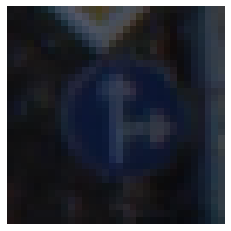

In [174]:
import cv2
 
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])


(32, 32)


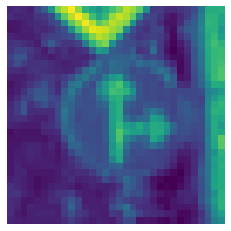

In [175]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


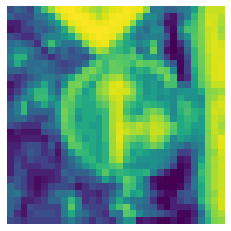

In [176]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

we visualized the effect of our preprocessing techniques we need to apply these techniques to all of our images so we will define a function that does so death preprocessing which will be used to process our entire dataset.

In [0]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [0]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))
 


(34799, 32, 32)


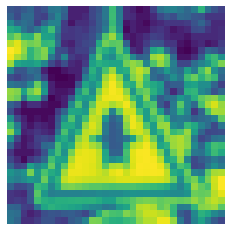

In [179]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)


After getting 3 out of 5 image that we have considered for testing went wrong we are aking One More Shot at improving out model using Data Augmentation. The reason is data augmentation technique is useful because it allows our model to look at each image in our dataset from a variety of different perspective.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

#width_shift_range = Refers to horizontal translation
#height_shift_range = Refers to vertical Tanslation
#This transformation is defined using shear intensity which simply refers to the magnitude of the shear angle in degrees as seen in the image above.
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)

The method for requesting our generator to create new images is by using the datagen.flow statement where statements datagen referring to our image generator and the flow is requesting the image generated and we define our (x train, y train) is the data that our image generator will use for creating new images.

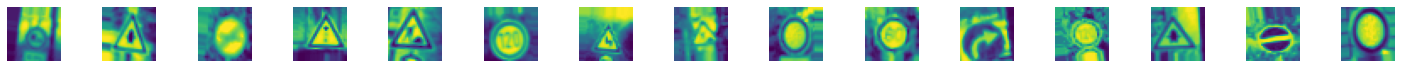

In [182]:
# for X_batch, y_batch in
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
#print(X_batch.shape)

In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2016/06/lenet_architecture-768x226.png)

In [184]:
"""
def lenet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
model = lenet_model()
print(model.summary())
"""

"\ndef lenet_model():\n  model = Sequential()\n  model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 1), activation='relu'))\n  model.add(MaxPooling2D(pool_size=(2, 2)))\n  \n  model.add(Conv2D(15, (3, 3), activation='relu'))\n  model.add(MaxPooling2D(pool_size=(2, 2)))\n  \n  \n  model.add(Flatten())\n  model.add(Dense(500, activation='relu'))\n  model.add(Dropout(0.5))\n  model.add(Dense(43, activation='softmax'))\n  \n  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])\n  return model\nmodel = lenet_model()\nprint(model.summary())\n"

In [185]:
"""
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
"""


"\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.title('Loss')\nplt.xlabel('epoch')\n"

In [186]:
"""
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')
"""

"\nplt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.legend(['training','test'])\nplt.title('Accuracy')\nplt.xlabel('epoch')\n"

In [187]:
"""
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score", score[0])
print("Test Accuracy", score[1])
"""

'\nscore = model.evaluate(X_test, y_test, verbose=1)\nprint("Test Score", score[0])\nprint("Test Accuracy", score[1])\n'

We see that the loss is even higher at a minimum value of about points 0.9 I would say  and the validation loss is even higher at about point 0.25. But it's pretty high and moving on to accuracy.

We see that we get a training accuracy of about 0.96 while our validation Accuracy seems to lag behind at a maximum value of 0.9 for I believe it was 093. These values imply that our network is not performing effectively in terms of accurately predicting images from our dataset. And what's more our network seems to have overfit in our data as well. This can be seen visibly in our graphs due to the fact that our validation Acucracy is trailing behind
our training accuracy and it's pretty much doing that from the get go. Evaluating our model also shows that right now work is not at peak performance. It has a relatively low accuracy rating. So obviously we must fine tune our model to improve its performance.

Traffic sign at a site is going to be more difficult to classify than MNIST due to fewer training images more complex data and a much higher number of classes in which these traffic signs are being classified and also noting the non-uniform distribution of images that we have. And so for this reason we're very same LeNet model that performed very well with the MNIST dataset
is now having issues classifying our traffic signs it is that correctly.

So let's see how we can fine tune our network to give us better performance.We have two main issues that we are dealing with.


1.   Firstly our accuracy is not as high as we would like.
2.   network seems to be overfitting our training data.

In [188]:
# 1. Degrading our learning rate by the factor of 10
# 2. increasing number of filters
# 3. Adding extra convolution layer with same number of increased filter.
# 4. Adding another dropout layer below maxpool line 8
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Dropout(0.5)) (After Data Augmentation this was affecting the accuracy)
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
model = modified_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 480)              

In [189]:
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val), batch_size=400, verbose=1, shuffle=1)
#after Data augmentation 
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.8720 - accuracy: 0.7453 - val_loss: 0.0902 - val_accuracy: 0.9764
Epoch 2/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.2072 - accuracy: 0.9364 - val_loss: 0.0599 - val_accuracy: 0.9832
Epoch 3/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1384 - accuracy: 0.9582 - val_loss: 0.0584 - val_accuracy: 0.9862
Epoch 4/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1092 - accuracy: 0.9670 - val_loss: 0.0336 - val_accuracy: 0.9918
Epoch 5/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.0920 - accuracy: 0.9725 - val_loss: 0.0493 - val_accuracy: 0.9848
Epoch 6/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.0826 - accuracy: 0.9752 - val_loss: 0.0375 - val_accuracy: 0.9905
Epoch 7/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.0720 - accuracy: 0.9780 - val_loss: 0.0297 -

we can see here our accuracy jumpend up to 96% and val_acuracy to 98% after all modification listed above so the model is more genralized to new data  but it was not up to the mark after first 3 modification as overfitting is still there

Text(0.5, 0, 'epoch')

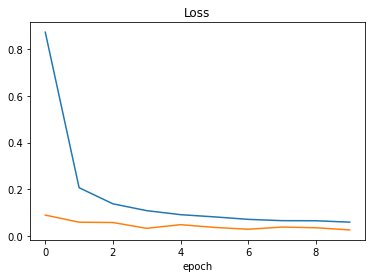

In [190]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 


Text(0.5, 0, 'epoch')

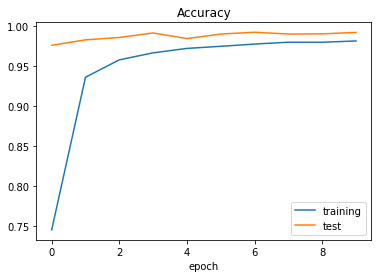

In [191]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [192]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score", score[0])
print("Test Accuracy", score[1])

12630/12630 [==============================] - 1s 92us/step
Test Score 0.1147037651910987
Test Accuracy 0.972288191318512


And so by plotting our loss and validation loss of plot's we can see that we have sold our issue of overfitting our validation loss is always lower than the training loss and we can see the same thing in our accuracy's I revalidation ocracy is also higher than our training ocracy which implies that our model is better equipped to generalize itself towards new data.

This can also be seen by evaluating our model and the model test should come out with a pretty high value almost 0.96.

Testing Our Model

Testing images
1. https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg (Pridicted successfully)
2. https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg (Predicted UnsucessFully) (34 was correct) (even After Data Augmentation we got 38)
3. https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg (predicted Correctly)
4. https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg (predicted incorrectly) (13 was correct got 2) (Got correct after data augmentation)
5. https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg (Predicted Incorrectly) (correct was 29 got 30) (Got wrong even after Data Augmentation)

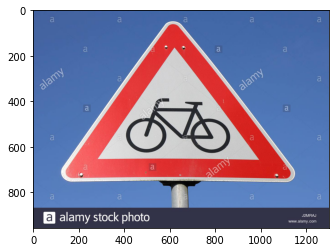

In [201]:
#fetch image
 
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


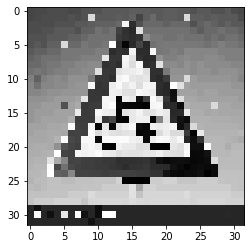

In [202]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)

In [204]:
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))


predicted sign: [31]
